In [1]:
import os
import csv
import pickle
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from collections import defaultdict

from utils import savefig

plt.rcParams['font.size'] = 14

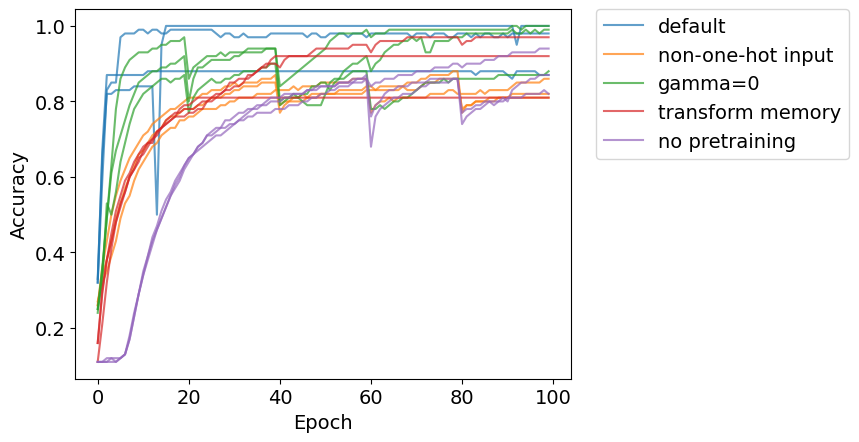

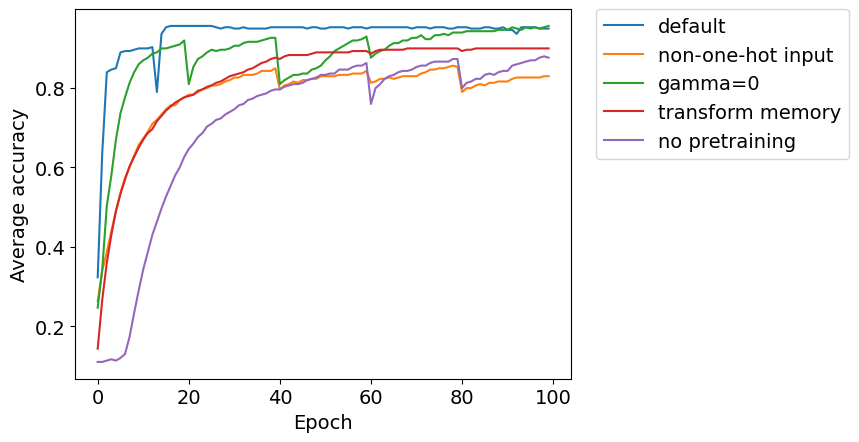

In [24]:
training_curve_folder = Path("./experiments/VaryParam/saved_models/ValueMemoryGRU")
setup_names = os.listdir(training_curve_folder)
training_curves = defaultdict(list)

for setup_name in setup_names:
    exp_name = setup_name.split("-")[0]
    exp_num = int(setup_name.split("-")[1])
    file_name = "accuracy_2.npy"
    if "nopretrain" in setup_name:
        file_name = "accuracy_1.npy"
    if os.path.exists(training_curve_folder / setup_name / file_name):
        training_data = np.load(training_curve_folder / setup_name / file_name)
        zero_indices = np.where(training_data == 0)[0]
        if len(zero_indices) > 0:
            last_zero_index = zero_indices[0]
            training_data[last_zero_index:] = training_data[last_zero_index-1]
        data = np.zeros(100)
        if len(training_data) < 100:
            data[:len(training_data)] = training_data
            data[len(training_data):] = training_data[-1]
        else:
            data = training_data[:100]
        training_curves[exp_name].append(data)

plot_names = ['setup', 'setup_featureinput', 'setup_gamma0', 'setup_memtransform', 'setup_nopretrain']
labels = ['default', 'non-one-hot input', 'gamma=0', 'transform memory', 'no pretraining']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
for i, exp_name in enumerate(plot_names):
    if exp_name in training_curves:
        for j in range(len(training_curves[exp_name])):
            if j == 0:
                plt.plot(training_curves[exp_name][j], label=labels[i], color=colors[i], alpha=0.7)
            else:
                plt.plot(training_curves[exp_name][j], color=colors[i], alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

for i, exp_name in enumerate(plot_names):
    if exp_name in training_curves:
        plt.plot(np.mean(training_curves[exp_name], axis=0), label=labels[i], color=colors[i])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("Epoch")
plt.ylabel("Average accuracy")
plt.show()